# Numerical Recipes Workshop 8
For the week of 11-15 November, 2019

This notebook will cover discrete fourier transforms, polynomial fitting, and reading csv files.

**If you downloaded this notebook from Learn, make sure to also download the file called "savant_data.csv".**

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from scipy import signal

In [5]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Discrete Fourier Transforms

The [numpy.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) module contains functionality for calculating discrete fourier transforms using the Fast Fourier Transform (FFT) method.

Consider a simple sine wave.

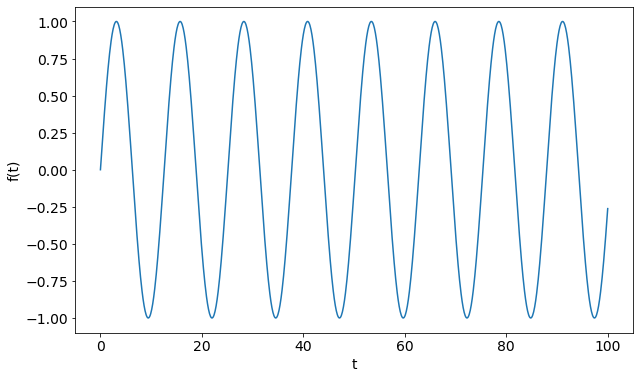

In [6]:
t = np.linspace(0, 100, 1001)
y = np.sin(0.5 * t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

We can use the [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) or [numpy.fft.rfft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft) (since the input is real) functions to compute the FFT of the signal.

The FFT will be calculated for frequencies up to $t_{max}/2$ (the Nyquist frequency), but purposes of display, we limit it to something smaller. Feel free to try plotting the full range.

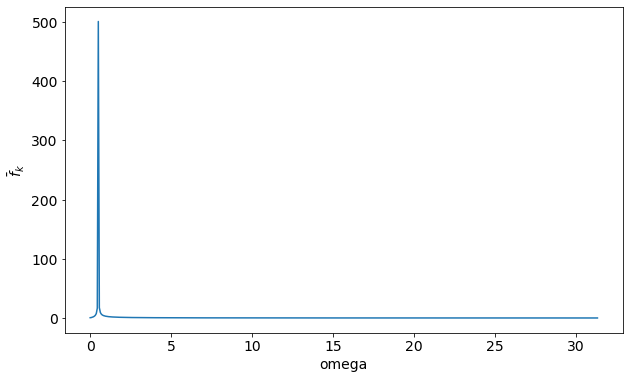

In [7]:
hh = abs(np.fft.rfft(y))
nn = t.size // 2
freq = np.linspace(0, 2*np.pi*(nn-1)/t.max(), nn)

plt.plot(freq, hh[:nn])
plt.xlabel('omega')
plt.ylabel('$\\bar{f}_{k}$')
plt.show()

In [8]:
hh.size

501

Assume for the moment that you don't know the values of $\pi$, $e$, and $\gamma$ ([the Euler–Mascheroni constant](https://en.wikipedia.org/wiki/Euler%E2%80%93Mascheroni_constant)). They have been used to generate the signal below. Perform an FFT to recover the numerical values of the constants.

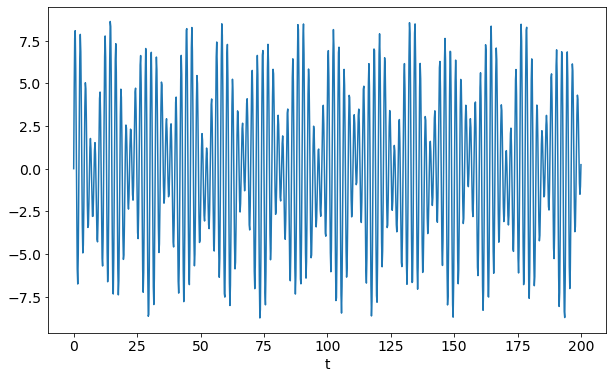

In [71]:
A = np.pi
B = np.e
C = np.euler_gamma
t = np.linspace(0, 200, 1001)
y = 5*np.sin(A*t) + 3*np.sin(B*t) + 1*np.sin(C*t)

plt.plot(t, y)
plt.xlabel('t')
plt.show()

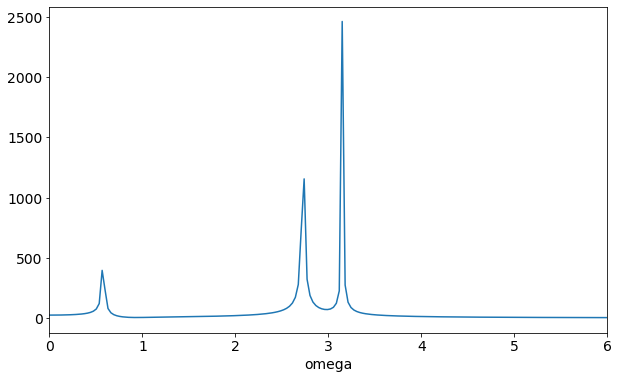

In [72]:
ft = abs(np.fft.rfft(y))
nn = ft.size
freq = np.linspace(0, 2*np.pi*nn/t.max(), nn)
plt.plot(freq, ft[:nn])
plt.xlim(0,6)
plt.xlabel('omega')
plt.show()

In [82]:
def get_freq(ft):
    peak_locations = signal.find_peaks(ft)
    pie, euler, gamma = freq[18], freq[87], freq[100]
    return pie, euler, gamma
get_freq(ft)

(0.5654866776461628, 2.73318560862312, 3.1415926535897936)

## Polynomial Fitting

The [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function will provide a least squares fit to an Nth order polynomial.

Below we will generate 100 random data points that roughly fit a 3rd order polynomial. We will apply a 5% error so the fit is not exact.

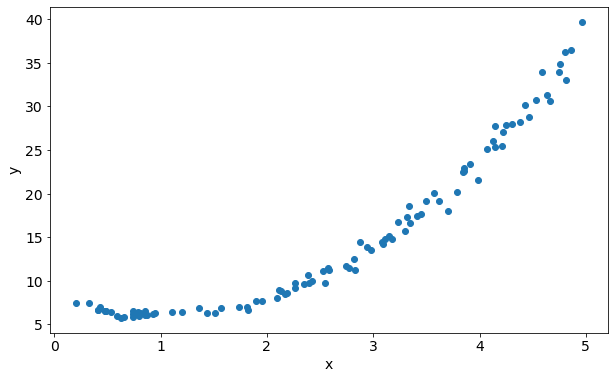

In [84]:
x = 5 * np.random.random(100)
A = 2
B = -4
C = 8
y = A * x**2 + B * x + C
y *= np.random.normal(loc=1, scale=0.05, size=x.size)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The data can be fed into the `polyfit` function to find a best fitting polynomial. Note, we must supply the order of the polynomial ourselves.

The `coeff` return value is an array of the coefficients of the polynomial. The `sqres` return value is the sum of the squared residuals.

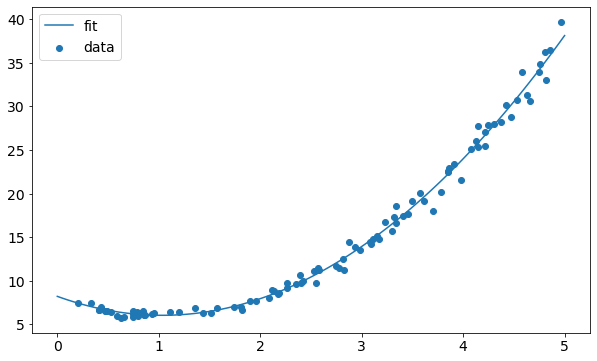

coefficients:  [ 2.04054398 -4.21328988  8.18827079]
sum of squared residuals = 64.38681801209687


In [97]:
coeff, sqres, _, _, _ = np.polyfit(x, y, 2, full=True)

fitx = np.linspace(0, 5, 100)
fit = coeff[0] * fitx**2 + coeff[1] * fitx + coeff[2]
plt.scatter(x, y, label='data')
plt.plot(fitx, fit, label='fit')
plt.legend(loc='best')
plt.show()
print("coefficients: ", coeff)
print("sum of squared residuals =", sqres[0])

How do the coefficients and residuals change when we change the order of the fitted polynomial? How does increasing the error effect the result?

### The harmonics of a square wave

In lecture, we saw that the amplitudes of the harmonics of the triangular wave are proportional to $k^{-2}$ and those of the square wave are proportional to $k^{-1}$.

Below are samples of triangular and square wave signals. Pick one of these (or both!) and show that this is true.

In [98]:
from scipy import signal

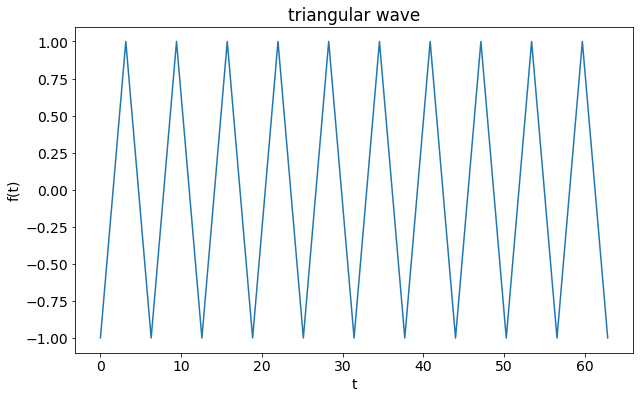

In [105]:
ttri = np.linspace(0, 20*np.pi, 1001)
ytri = signal.sawtooth(ttri, width=0.5)
plt.plot(ttri, ytri)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('triangular wave')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (501,) and (25,)

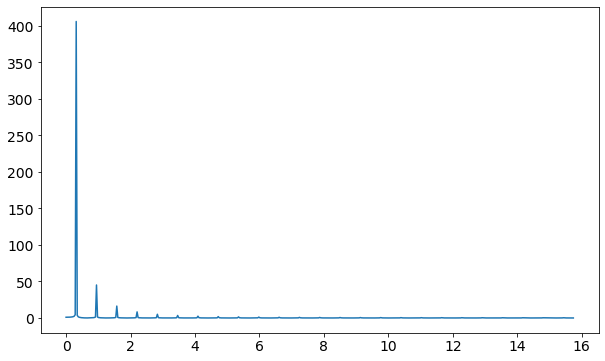

In [139]:
tri_ft = abs(np.fft.rfft(ytri))
N = 501
omega = np.linspace(0, 2*np.pi*N/t.max(), N)
peaks, _ = signal.find_peaks(tri_ft)
fitx = np.linspace(0, 2*np.pi*N/t.max(), peaks.size)
amplitudes = tri_ft[peaks]
coeff, sqres, _, _, _ = np.polyfit(fitx, amplitudes, 1, full=True)
fit = coeff[0] * fitx**2 + coeff[1] * fitx

plt.plot(omega, tri_ft[:N], label = 'FT')
plt.plot(omega, amplitudes, label = 'dependance')
plt.plot(fitx, fit, label='fit')
plt.xlim(0,8)
plt.ylabel('Amplitude')
plt.xlabel('$\omega$')
plt.show()







array([4.06162050e+02, 4.51881473e+01, 1.63103524e+01, 8.35437548e+00,
       5.08048194e+00, 3.42342828e+00, 2.47057492e+00, 1.87295545e+00,
       1.47377491e+00, 1.19410481e+00, 9.90700301e-01, 8.38257132e-01,
       7.21169459e-01, 6.29389654e-01, 5.56212633e-01, 4.97026300e-01,
       4.48575057e-01, 4.08509042e-01, 3.75099141e-01, 3.47051610e-01,
       3.23384493e-01, 3.03343403e-01, 2.86343041e-01, 2.71925922e-01,
       2.59732849e-01])

In [ ]:
tsqu = np.linspace(0, 20*np.pi, 1001)
ysqu = signal.square(tsqu)

plt.plot(tsqu, ysqu)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('square wave')
plt.show()



## Reading csv files

CSV (comma-separated value) files are the bread and butter of every data scientist. CSV files form the basis of most spreadsheet type data and can usually be read by applications like Microsoft Excel. It is reasonably straightforward to code up a CSV reader in Python, but many complications can arise that will give any developer headaches, like data of mixed type (strings, numbers, dates, etc) and missing values. And who has time for that anyway?

Fortunately, the [pandas](https://pandas.pydata.org/) library has a sophisticated [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function capable of dealing with most of these issues. This function will load a CSV file into a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object, which acts very much like a dictionary of NumPy arrays.

Below, we will load a data file containing information on every baseball put into play during the 2019 Major League Baseball season.

In [140]:
import pandas

In [141]:
data = pandas.read_csv('savant_data.csv')

As mentioned before, a `DataFrame` is much like a dictionary, so we can see all of the available data fields by printing out `data.keys()`

In [142]:
print (data.keys())

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

Likewise, any data field can be accessed by doing `data[field]`. For example, let's get the launch angle for every batted ball.

In [144]:
angle = data['launch_angle']
exit_velocity = data['launch_speed']

Plot histograms of launch angle and exit velocity ('launch_speed'). How good were our approximations of these distributions as Gaussians in Workshop 7? How accurate was the predicted baseball flight distance ('hit_distance_sc') using the Monte Carlo method?

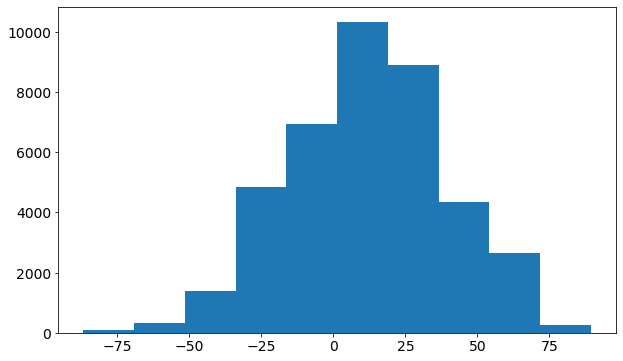

In [146]:
plt.
plt.hist(angle)
plt.show()